#### EDA Student Performance Indicator
1) problem statement
 >This Project understands how the student's performance (test scores) is affected by other variables such as Gender ,Ethnicity ,Parental of education ,Lunch and Test Preparation course.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df = pd.read_csv(r"C:\Users\Prince\Downloads\exams.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,master's degree,free/reduced,none,80,82,72
1,female,group E,associate's degree,standard,none,84,78,84
2,male,group D,some college,standard,completed,62,65,70
3,female,group D,associate's degree,standard,none,63,74,73
4,female,group A,high school,standard,none,63,72,66


In [4]:
df.shape

(1000, 8)

# Data Ckecks to perform

### <Check Missing values
### <Check Duplicate
### <Check data type
### <Check the number of unique values of each column
### <Check statistics of Dataset
### <Check various categories present in the        different categorical column

In [5]:
# CHECK MISSING VALUES
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Insights or Observsation
#### There are no missing values

In [6]:
# find duplicate value
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

### There are no duplicates values in the dataset

In [9]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [10]:
### Checking the number of uniques values of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  74
writing score                  77
dtype: int64

In [11]:
## check the statistics of the dataset
df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.473473,69.202202,68.065065
std,15.071209,14.437175,15.273878
min,10.000000,24.000000,20.000000
25%,56.500000,60.000000,58.000000
50%,67.000000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


# Insights or Observation
#### From the above description of numerical data, all means are very close to each other - between 66 and 69
#### All the standard deviation are also close - between 14.5 - 15.19
#### While there is a minimum of 0 for maths, other are having 17 and 10 vlaue

In [12]:
# Explore more info about the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,master's degree,free/reduced,none,80,82,72
1,female,group E,associate's degree,standard,none,84,78,84
2,male,group D,some college,standard,completed,62,65,70
3,female,group D,associate's degree,standard,none,63,74,73
4,female,group A,high school,standard,none,63,72,66


In [13]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group C,some high school,standard,none,52,65,62
996,female,group A,some college,free/reduced,none,50,57,55
997,female,group C,bachelor's degree,free/reduced,completed,69,82,87
998,female,group D,high school,standard,none,71,66,72
999,female,group C,associate's degree,standard,none,73,86,79


In [14]:
[feature for feature in df.columns if df[feature].dtype!='O']

['math score', 'reading score', 'writing score']

In [15]:
# segregate numerical and categical features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

In [16]:
numerical_features

['math score', 'reading score', 'writing score']

In [17]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [18]:
df['gender'].value_counts()

gender
female    515
male      484
Name: count, dtype: int64

In [19]:
## Aggregate the total score with mean
df['total_score'] = (df['math score']+df['reading score']+df['writing score'])
df['average']= df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group E,master's degree,free/reduced,none,80,82,72,234,78.000000
1,female,group E,associate's degree,standard,none,84,78,84,246,82.000000
2,male,group D,some college,standard,completed,62,65,70,197,65.666667
3,female,group D,associate's degree,standard,none,63,74,73,210,70.000000
4,female,group A,high school,standard,none,63,72,66,201,67.000000


<Axes: xlabel='average', ylabel='Count'>

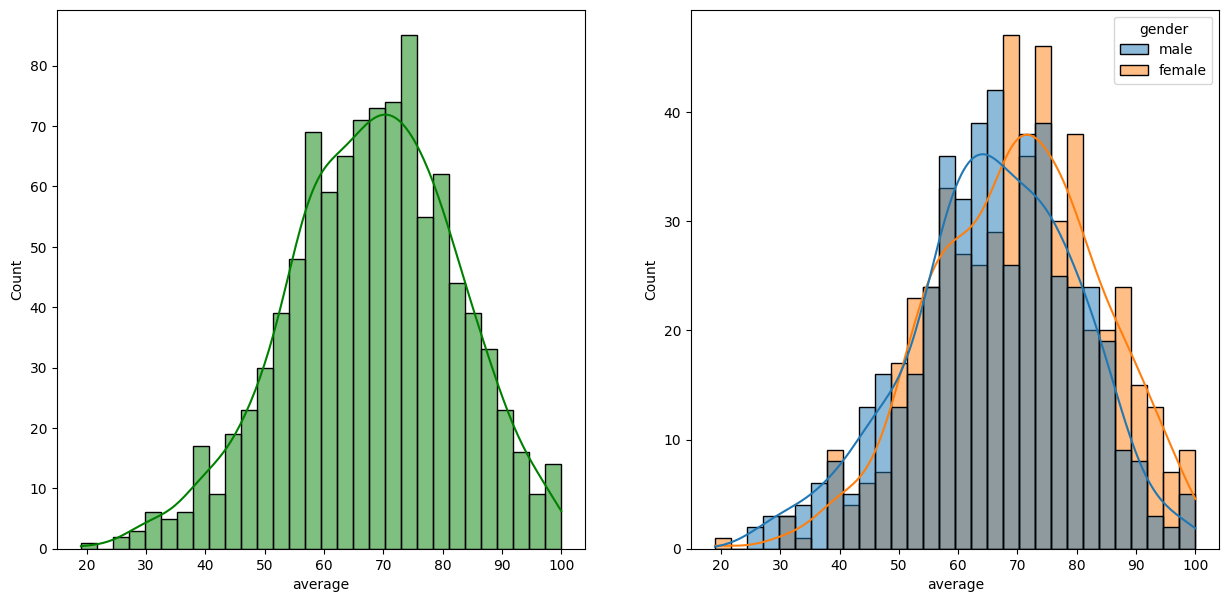

In [20]:
### Exploring more visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30 ,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

## Insights
 ### Female students tend to perform well than male students

<Axes: xlabel='average', ylabel='Count'>

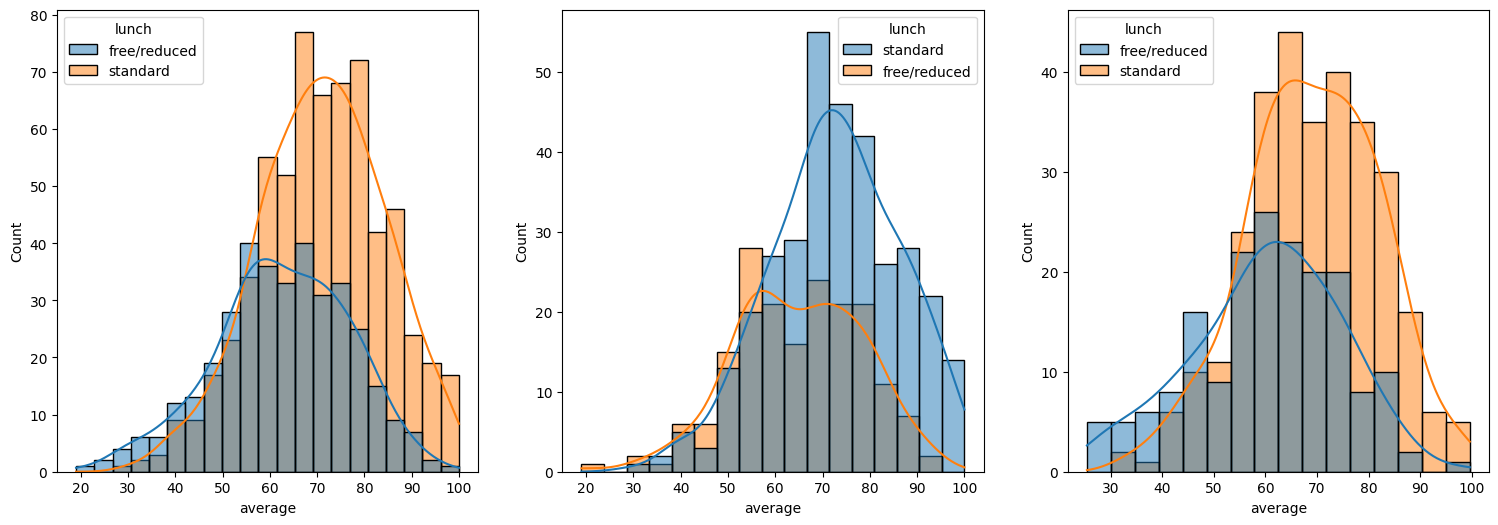

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

# Insights
#### Standard Lunch help students perform well in exams
#### Standard Lunch helps perform well in exams be it a male of female

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group E,master's degree,free/reduced,none,80,82,72,234,78.000000
1,female,group E,associate's degree,standard,none,84,78,84,246,82.000000
2,male,group D,some college,standard,completed,62,65,70,197,65.666667
3,female,group D,associate's degree,standard,none,63,74,73,210,70.000000
4,female,group A,high school,standard,none,63,72,66,201,67.000000


<Axes: xlabel='average', ylabel='Count'>

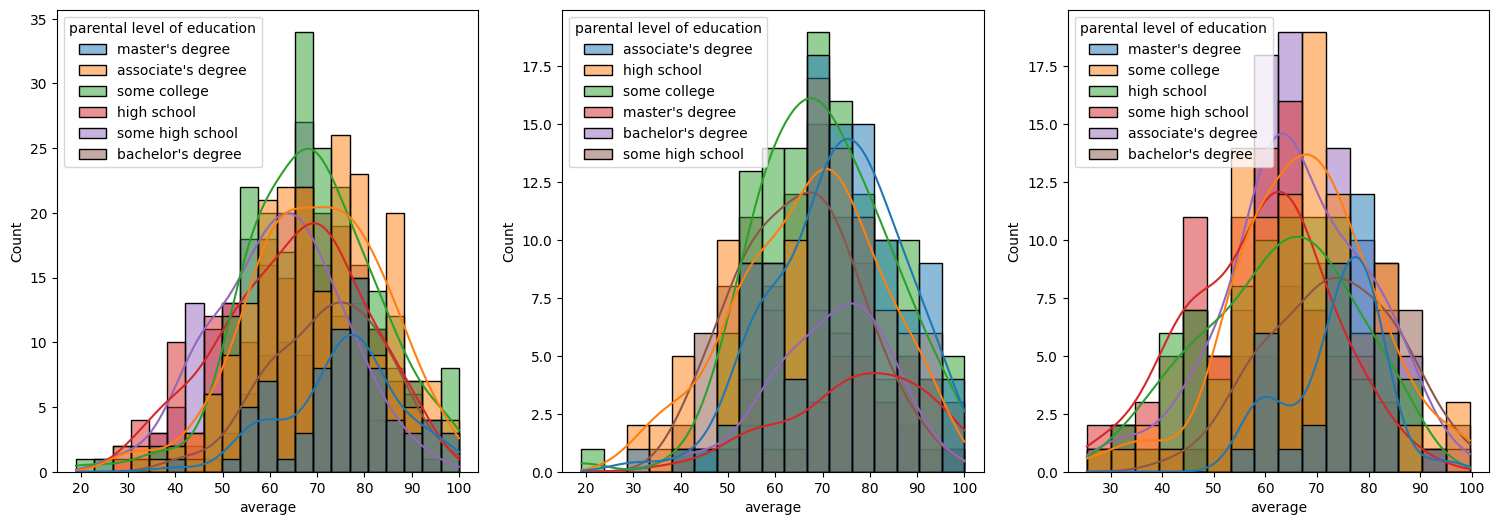

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

# insights
#### In general parent's eduction don't help student perform well in exam.
#### 3nd plot show that parents whose eductaion is of associate degree or master degree their male child tend to perform well in exam.
#### 2rd plot we can see there is no effect of parent's education on female students.

<Axes: xlabel='average', ylabel='Count'>

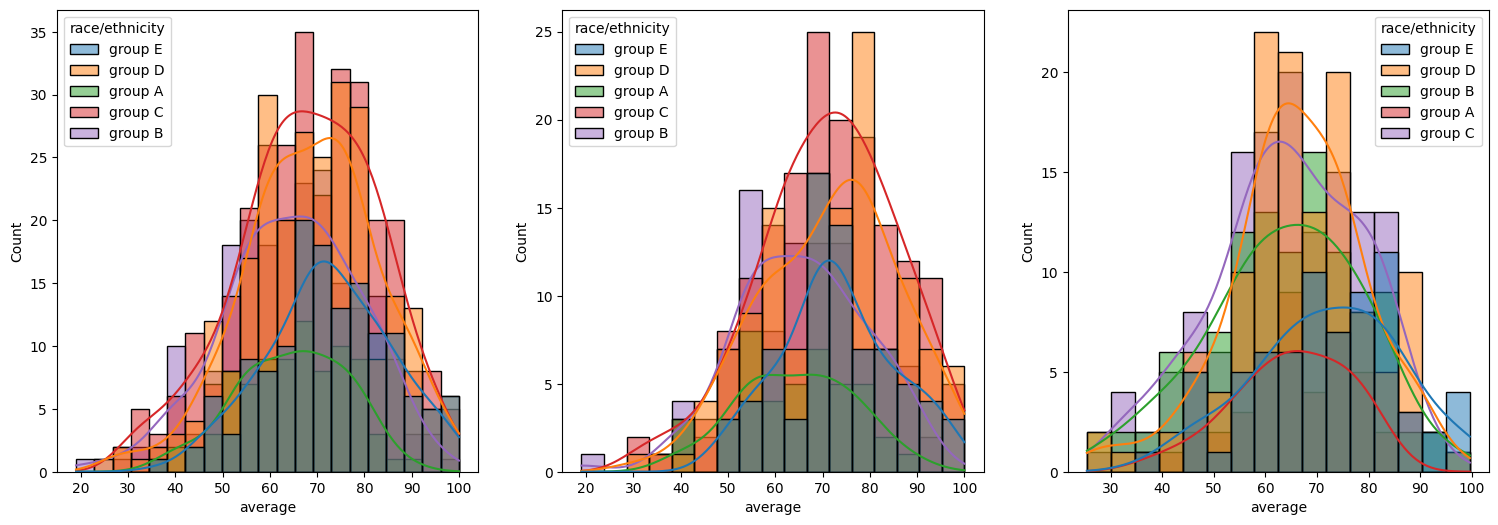

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')

# Insights
#### student of group A and group b tends to perform poorly in exam.
#### Student of group A and group B to perform poorly in exam irrespective of whether they are male or feamle.

<Axes: >

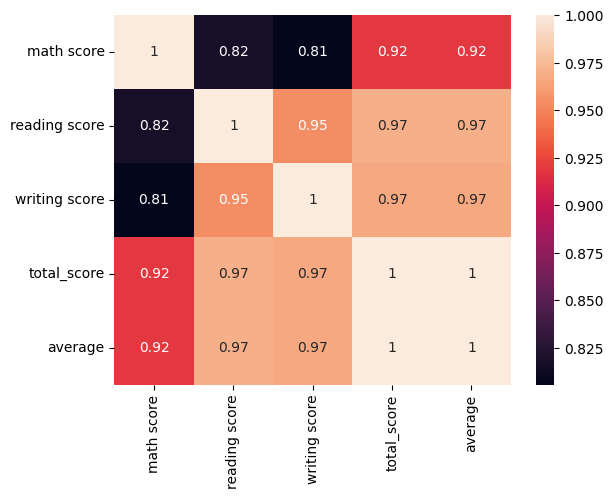

In [27]:
df = df.select_dtypes(include=['number'])
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)